In [44]:
import data_prep
from mpaa_analysis import *
from sklearn.metrics import confusion_matrix

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

##Data Parsing

In [45]:
%%time

genre_listing = data_prep.read_genres('imdb/genres.list')
rating_listing = data_prep.read_ratings('imdb/ratings.list')
mpaa = data_prep.read_mpaa('imdb/mpaa-ratings-reasons.list')

movies = data_prep.merge_all(rating_listing, genre_listing, mpaa)

train, test = split_data(movies)

vectorizer, train_data_features = create_train_features(train)
test_data_features = create_test_features(test, vectorizer)

Parsing genre list documentation block
Reading genre list into memory
Parsing ratings documentation block
Parse ratings lines and convert to DataFrame
Filter set to true, ignoring entries with <1000 entries
31783 movies returned
Opening mpaa files
Cleaning mpaa data
Performing initial merge
Cleaning title
CPU times: user 19 s, sys: 809 ms, total: 19.8 s
Wall time: 20.1 s


##Classifier Training and Prediction

In [46]:
forest = fit_random_forest(train, train_data_features, 'label')
xforest = fit_xrandom_forest(train, train_data_features, 'label')
trees = fit_dectree(train, train_data_features, 'label')

In [47]:
test_forest = pred_random_forest(test, test_data_features, forest)
test_xforest = pred_xrandom_forest(test, test_data_features, forest)
test_trees = pred_dectree(test, test_data_features, forest)

In [48]:
def show_conf_mat(test):
    conf = confusion_matrix(test.label.astype('str').values,
                                 test.predictions.astype('str').values)
    conf_norm = conf.astype('float') / conf.sum(axis=1)
    plt.imshow(conf_norm, interpolation='nearest', cmap=plt.cm.Blues)

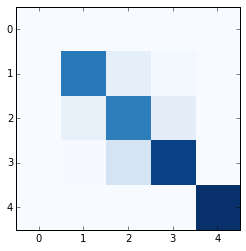

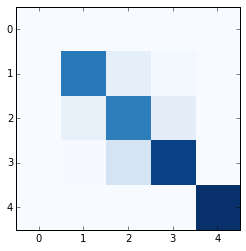

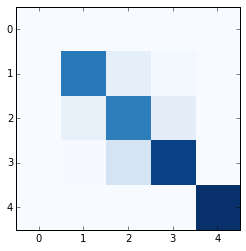

In [49]:
plt.figure()
show_conf_mat(test_forest)

plt.figure()
show_conf_mat(test_trees)

plt.figure()
show_conf_mat(test_xforest)

In [50]:
print confusion_matrix(test_forest.label.astype('str').values,
                       test_forest.predictions.astype('str').values)

print confusion_matrix(test_xforest.label.astype('str').values,
                       test_xforest.predictions.astype('str').values)

print confusion_matrix(test_trees.label.astype('str').values,
                       test_trees.predictions.astype('str').values)

[[   0    0    0    2    0]
 [   0  163   41   23    0]
 [   0   16  329  123    0]
 [   0    1   81 1131    0]
 [   0    0    0    0    2]]
[[   0    0    0    2    0]
 [   0  163   41   23    0]
 [   0   16  329  123    0]
 [   0    1   81 1131    0]
 [   0    0    0    0    2]]
[[   0    0    0    2    0]
 [   0  163   41   23    0]
 [   0   16  329  123    0]
 [   0    1   81 1131    0]
 [   0    0    0    0    2]]


In [51]:
movies

,title,votes,rating,genres,label,reason,reason_clean
0,"""American Masters"" (1985) {Sketches of Frank G...",1354,7.1,"set([Documentary, Biography])",PG-13,for brief strong language,for brief strong language
1,"""Around the World in 80 Days"" (1989/I)",2174,7.2,"set([Action, Drama, Romance, Comedy, Adventure])",PG,"for sensuality, adventure action and language",for sensuality adventure action and language
2,"""Clerks"" (2000)",10156,7.4,"set([Comedy, Animation])",R,for some sexual humor,for some sexual humor
3,"""Colditz"" (2005)",1946,6.8,"set([Drama, War])",R,"for some violence, language, nudity and drug use",for some violence language nudity and drug use
4,"""Dead Man's Walk"" (1996)",1078,7.3,set([Western]),PG-13,for violence and thematic elements involving t...,for violence and thematic elements involving t...
5,"""Gulliver's Travels"" (1996)",5066,7.0,"set([Fantasy, Adventure, Family])",PG,for thematic elements,for thematic elements
6,"""Independent Lens"" (1999) {Enron: The Smartest...",4503,7.9,"set([Documentary, History])",R,for language and some nudity,for language and some nudity
7,"""Lexx: The Dark Zone"" (1996)",1677,8.0,"set([Sci-Fi, Drama, Fantasy, Adventure, Action...",R,for sci-fi violence and gore,for sci fi violence and gore
8,"""Mary Bryant"" (2005)",1820,7.6,"set([Drama, Adventure])",R,"for violence including rape, sexuality and som...",for violence including rape sexuality and som...
9,"""Moby Dick"" (1998)",2951,6.5,"set([Drama, Adventure, Thriller])",PG,for mild language and for some intense whaling...,for mild language and for some intense whaling...
